### Applying Traditional Machine Learning Algorithm 
#### Md. Asifur Rahman Asif
#### ID: 18.02.04.114

In [160]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [161]:
df = pd.read_csv("latest_water_potability.csv")

display(df.head(10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


#### Data Preprocessing

In [162]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [163]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

In [164]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Random Oversampling Imbalanced Datasets

In [166]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [167]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


#### Standardization

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()

In [170]:
scaler.fit(df.drop('Potability', axis=1))

StandardScaler()

In [171]:
scaled_features =scaler.transform(df.drop('Potability', axis=1))

In [172]:
scaled_features

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [173]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [174]:
df_feat = pd.concat([pd.DataFrame(df_feat), pd.DataFrame(df['Potability'])], axis=1)

In [175]:
df_feat

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124,1
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627,1
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007,1
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797,1


In [176]:
df_feat

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124,1
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627,1
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007,1
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797,1


In [177]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [178]:
df_feat['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [179]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df_feat.drop('Potability', axis=1), df_feat['Potability'])
df_feat = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [180]:
df_feat['Potability'].value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [181]:
df_feat

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,0,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,0,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...,...
3991,1,-0.216874,-0.134780,-0.328239,-0.704871,-0.746730,-0.141491,0.605550,-0.369608,0.836987
3992,1,-1.293709,-0.850112,0.460520,0.211374,-0.014799,-0.800511,-0.330566,-0.057716,-0.004758
3993,1,-0.118758,-1.225925,1.349744,1.421026,-1.615945,0.828031,-0.127186,0.391455,0.915816
3994,1,-0.032898,-0.469284,0.931506,2.049392,-2.114404,0.762701,-0.892061,0.150793,-0.245336


#### Train test seperation

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [184]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...
3991,-0.216874,-0.134780,-0.328239,-0.704871,-0.746730,-0.141491,0.605550,-0.369608,0.836987
3992,-1.293709,-0.850112,0.460520,0.211374,-0.014799,-0.800511,-0.330566,-0.057716,-0.004758
3993,-0.118758,-1.225925,1.349744,1.421026,-1.615945,0.828031,-0.127186,0.391455,0.915816
3994,-0.032898,-0.469284,0.931506,2.049392,-2.114404,0.762701,-0.892061,0.150793,-0.245336


In [185]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3991    1
3992    1
3993    1
3994    1
3995    1
Name: Potability, Length: 3996, dtype: int64

#### KNN

In [186]:
knn = KNeighborsClassifier()

In [187]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Training Accuracy

In [188]:
pred = knn.predict(X_train)

In [189]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.8069461827284106


#### Cross Validation

In [190]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [191]:
knn_acc

array([0.63125   , 0.63067293, 0.69170579, 0.6885759 , 0.62441315])

In [192]:
knn_acc.mean()

0.6533235524256651

In [193]:
from sklearn.metrics import classification_report, confusion_matrix

#### Test Accuracy

In [194]:
pred = knn.predict(X_test)

In [195]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.69


#### Confusion Matrix

In [196]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, pred))


confusion_matrix: 
 [[256 149]
 [ 99 296]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       405
           1       0.67      0.75      0.70       395

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [197]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)


True Negatives =  256
False Negatives =  99
False Positives =  149
True Positives =  296


#### True Positive Rate, Flase Positive Rate

In [198]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.75
False Positive Rate =  0.37


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

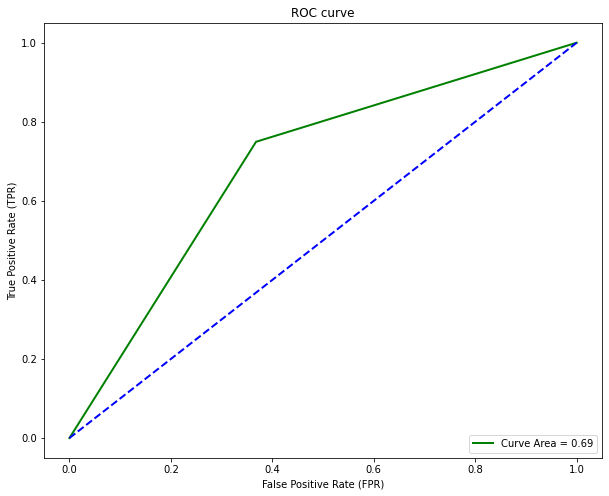

In [199]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

>1, train: 1.000, test: 0.744
>2, train: 0.910, test: 0.704
>3, train: 0.852, test: 0.690
>4, train: 0.827, test: 0.690
>5, train: 0.807, test: 0.690
>6, train: 0.784, test: 0.691
>7, train: 0.760, test: 0.677
>8, train: 0.750, test: 0.684
>9, train: 0.746, test: 0.677
>10, train: 0.731, test: 0.677
>11, train: 0.725, test: 0.675
>12, train: 0.718, test: 0.666
>13, train: 0.713, test: 0.666
>14, train: 0.713, test: 0.669
>15, train: 0.708, test: 0.667
>16, train: 0.704, test: 0.666
>17, train: 0.702, test: 0.662
>18, train: 0.701, test: 0.652
>19, train: 0.697, test: 0.646


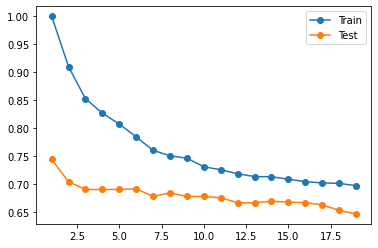

In [200]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

train_scores, test_scores = list(), list()
values = [i for i in range(1, 20)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [201]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

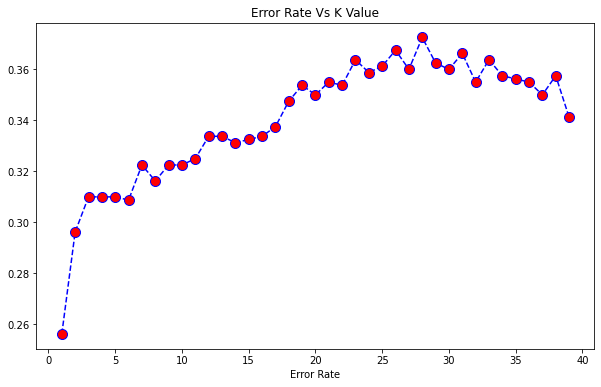

In [202]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title("Error Rate Vs K Value")

plt.xlabel('K')
plt.xlabel('Error Rate')
plt.show()

#### Determining the best value of K

In [203]:
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    
    confusion_matrix_ = confusion_matrix(y_test, pred)

    TN = confusion_matrix_[0,0]
   
    FN = confusion_matrix_[1,0]

    FP = confusion_matrix_[0,1]

    TP = confusion_matrix_[1,1]

    accuracy = accuracy_score(y_test,pred)
    
    precision = np.round(TP/(TP+FP), 2)
    recall = np.round(TP/(TP+FN), 2)
    f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)
    
    print(i)
    print("Accuracy = ",accuracy)
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("f1 score = ", f1_score_)
    print()

1
Accuracy =  0.74375
Precision =  0.7
Recall =  0.83
f1 score =  0.76

2
Accuracy =  0.70375
Precision =  0.75
Recall =  0.61
f1 score =  0.67

3
Accuracy =  0.69
Precision =  0.67
Recall =  0.75
f1 score =  0.71

4
Accuracy =  0.69
Precision =  0.71
Recall =  0.62
f1 score =  0.66

5
Accuracy =  0.69
Precision =  0.67
Recall =  0.75
f1 score =  0.71

6
Accuracy =  0.69125
Precision =  0.71
Recall =  0.63
f1 score =  0.67

7
Accuracy =  0.6775
Precision =  0.65
Recall =  0.75
f1 score =  0.7

8
Accuracy =  0.68375
Precision =  0.69
Recall =  0.65
f1 score =  0.67

9
Accuracy =  0.6775
Precision =  0.65
Recall =  0.74
f1 score =  0.69

10
Accuracy =  0.6775
Precision =  0.68
Recall =  0.66
f1 score =  0.67

11
Accuracy =  0.675
Precision =  0.65
Recall =  0.73
f1 score =  0.69

12
Accuracy =  0.66625
Precision =  0.67
Recall =  0.64
f1 score =  0.65

13
Accuracy =  0.66625
Precision =  0.65
Recall =  0.71
f1 score =  0.68

14
Accuracy =  0.66875
Precision =  0.68
Recall =  0.63
f1 scor

#### Hyperparameter Tuning

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
knn_params = {   
    "n_neighbors": range(1, 31, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 35, 5)
   
}

knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

kfinal_model = knn.set_params(**grid_result.best_params_)
kfinal_model.fit(X_train,y_train)
kpred = kfinal_model.predict(X_test)

print(classification_report(y_test, kpred))
print(confusion_matrix(y_test, kpred))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       405
           1       0.70      0.83      0.76       395

    accuracy                           0.74       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.74      0.74       800

[[268 137]
 [ 68 327]]
{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


#### 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

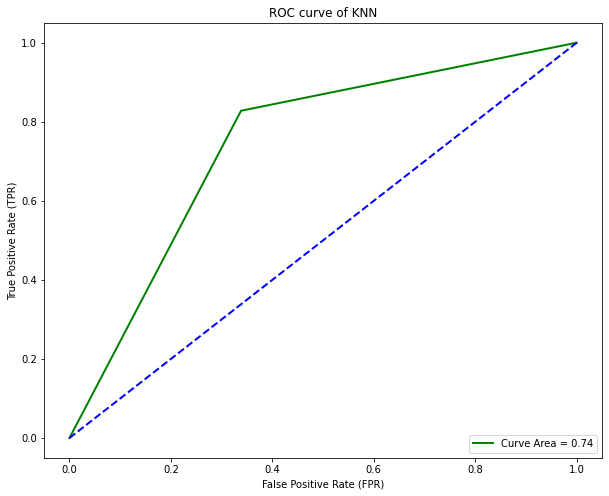

In [205]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, kpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve of KNN')
plt.legend(loc="lower right")
plt.show()

#### Training Accuracy

In [206]:
predh = kfinal_model.predict(X_train)

In [207]:
accuracy = accuracy_score(y_train,predh)
print(accuracy)

1.0


#### Cross Validation

In [208]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knnh_acc=cross_val_score(kfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knnh_proba=cross_val_predict(kfinal_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [209]:
knnh_acc

array([0.678125  , 0.71361502, 0.72456964, 0.71674491, 0.68075117])

In [210]:
knnh_acc.mean()

0.7027611502347417

#### Test Accuracy

In [211]:
pred = kfinal_model.predict(X_test) 

In [212]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.74375


#### Confusion Matrix

In [213]:
confusion_matrix_ = confusion_matrix(y_test,pred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test,pred))

confusion_matrix: 
 [[268 137]
 [ 68 327]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       405
           1       0.70      0.83      0.76       395

    accuracy                           0.74       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.74      0.74       800



In [214]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  268
False Negatives =  68
False Positives =  137
True Positives =  327


#### True Positive Rate, False Positive Rate

In [215]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.83
False Positive Rate =  0.34


In [216]:
# plot_confusion_matrix(grid_result, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### Decision Tree

In [217]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [218]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

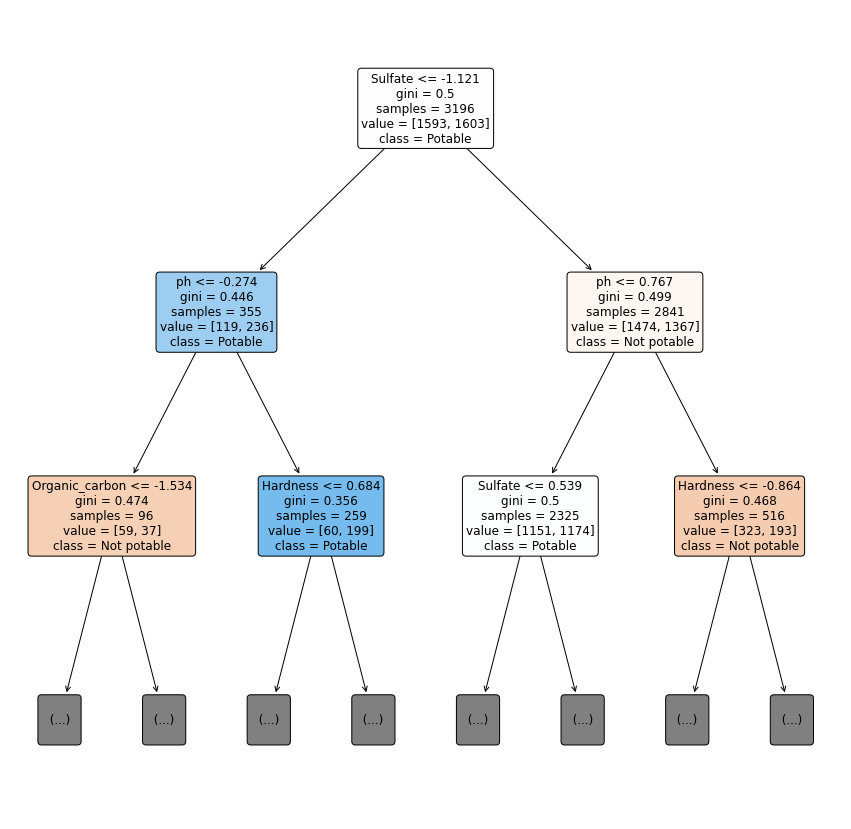

In [219]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, rounded=True, class_names = ["Not potable", 'Potable'],
         feature_names = X.columns, max_depth=2, fontsize=12)

plt.show()

In [220]:
dpred = dtree.predict(X_test)

#### Confusion Matrix

In [221]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpred))

confusion_matrix: 
 [[224 181]
 [126 269]]
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       405
           1       0.60      0.68      0.64       395

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.61       800



In [222]:
DTN = confusion_matrix_[0,0]
print("True Negatives = ", DTN)

DFN = confusion_matrix_[1,0]
print("False Negatives = ", DFN)

DFP = confusion_matrix_[0,1]
print("False Positives = ", DFP)

DTP = confusion_matrix_[1,1]
print("True Positives = ", DTP)

True Negatives =  224
False Negatives =  126
False Positives =  181
True Positives =  269


#### Test Accuracy

In [223]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.61625


#### True Positive Rate, False Positive Rate

In [224]:
DTPR = np.round(DTP/(DTP+DFN), 2)
DFPR = np.round(DFP/(DFP+DTN), 2)

print("True Positive Rate = ", DTPR)
print("False Positive Rate = ", DFPR)

True Positive Rate =  0.68
False Positive Rate =  0.45


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

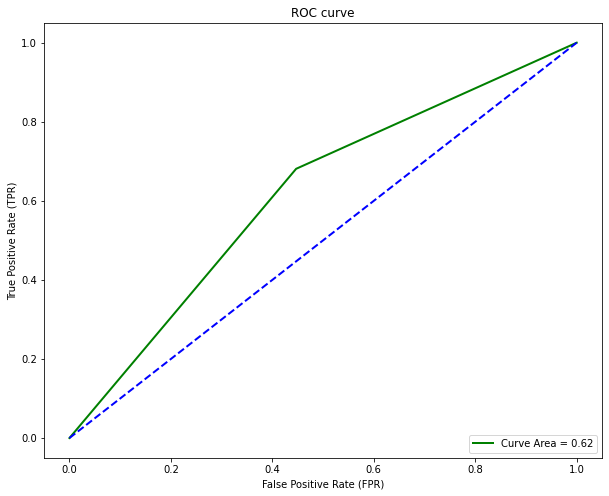

In [225]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Hyperparameter Tuning

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
dtree_params = {   
    "max_depth": range(1, 20, 2),
    "criterion": ['gini','entropy'],
    "max_features": ['auto'],
    "max_depth": range(3,20 , 1),
   
}

dtree = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

dfinal_model = dtree.set_params(**grid_result.best_params_)
dfinal_model.fit(X_train,y_train)
dpredh = dfinal_model.predict(X_test)

print(classification_report(y_test, dpredh))
print(confusion_matrix(y_test, dpredh))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       405
           1       0.58      0.62      0.60       395

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800

[[228 177]
 [152 243]]
{'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto'}


#### 'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto'

In [227]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [228]:
# dtreeh = DecisionTreeClassifier(criterion = 'gini', max_depth = 19, max_features = 'auto')
# dtreeh.fit(X_train,y_train)

#### Training Accuracy

In [229]:
dpredh = dfinal_model.predict(X_train)

In [230]:
accuracy = accuracy_score(y_train,dpredh)
print(accuracy)

0.9568210262828536


#### Cross Validation

In [231]:
from sklearn.model_selection import cross_val_score,cross_val_predict
dtc_acc=cross_val_score(dfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
dtc_proba=cross_val_predict(dfinal_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [232]:
dtc_acc

array([0.575     , 0.62597809, 0.58841941, 0.59311424, 0.61502347])

In [233]:
dtc_acc.mean()

0.599507042253521

#### Test Accuracy

In [234]:
dpredht = dfinal_model.predict(X_test)

In [235]:
accuracy = accuracy_score(y_test,dpredht)
print(accuracy)

0.58875


In [236]:
confusion_matrix_ = confusion_matrix(y_test, dpredht)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpredht))

confusion_matrix: 
 [[228 177]
 [152 243]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       405
           1       0.58      0.62      0.60       395

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800



In [237]:
# plot_confusion_matrix(dtreeh, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

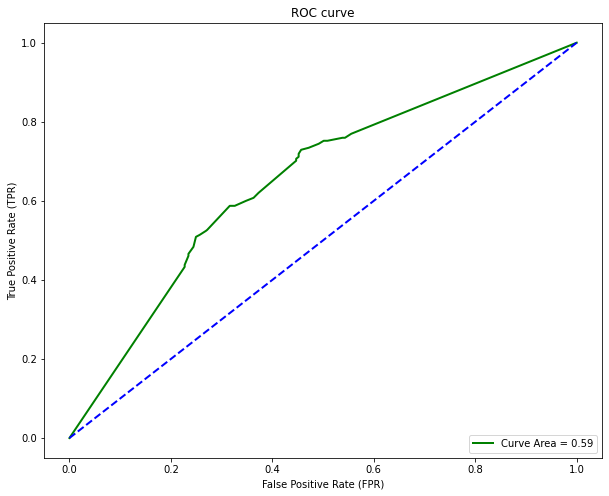

In [238]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, dpredht), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [239]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [240]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators=200)
#n_estimators=48, 83, 100, 120
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

#### Training Accuracy

In [241]:
rfc_pred = rfc.predict(X_train)

In [242]:
accuracy = accuracy_score(y_train,rfc_pred)
print(accuracy)

1.0


#### Cross Validation

In [243]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rfc_acc=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
rfc_proba=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [244]:
rfc_acc

array([0.6828125 , 0.69953052, 0.7198748 , 0.74334898, 0.71674491])

In [245]:
rfc_acc.mean()

0.7124623435054772

#### Test Accuracy

In [246]:
rfc_pred = rfc.predict(X_test)

In [247]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.74125


#### Confusion Matrix

In [248]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, rfc_pred))

confusion_matrix: 
 [[297 108]
 [ 99 296]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       405
           1       0.73      0.75      0.74       395

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [249]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  297
False Negatives =  99
False Positives =  108
True Positives =  296


#### True Positive Rate, False Positive Rate

In [250]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.75
False Positive Rate =  0.27


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

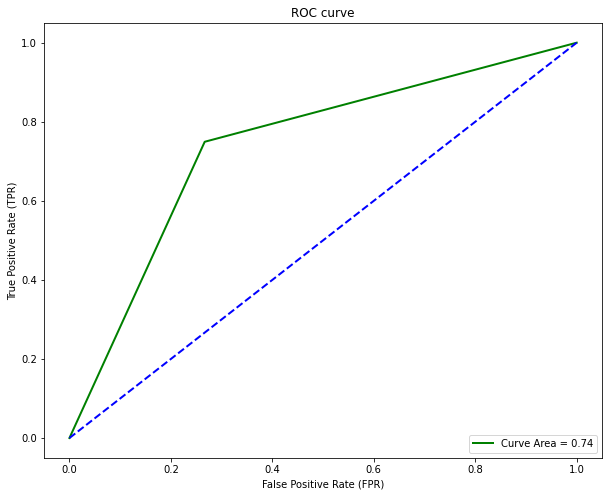

In [251]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [252]:
# plot_confusion_matrix(rfc, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
rf_params = {   
    "n_estimators": [100, 200, 300],
    "max_depth": range(1, 20, 2),
    "criterion": ['gini','entropy'],
    "max_features": ['auto'],
}

rf = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

rf_final_model = rf.set_params(**grid_result.best_params_)
rf_final_model.fit(X_train,y_train)
rf_predh = rf_final_model.predict(X_test)

print(classification_report(y_test, rf_predh))
print(confusion_matrix(y_test, rf_predh))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       405
           1       0.75      0.75      0.75       395

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

[[305 100]
 [100 295]]
{'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'n_estimators': 300}


In [254]:
predh = rf_final_model.predict(X_test)

In [255]:
accuracy = accuracy_score(y_test,predh)
print(accuracy)

0.75


#### SVC

In [256]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [257]:
from sklearn.svm import SVC
svc_algo = SVC(random_state=50,probability=True)


In [258]:
svc_algo.fit(X_train,y_train)

SVC(probability=True, random_state=50)

#### Training Accuracy

In [259]:
svc_pred = svc_algo.predict(X_train)

In [260]:
accuracy = accuracy_score(y_train,svc_pred)
print(accuracy)

0.7525031289111389


#### Cross Validation

In [261]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc=cross_val_score(svc_algo,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
svc_proba=cross_val_predict(svc_algo,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [262]:
svc_acc

array([0.621875  , 0.64945227, 0.66040689, 0.69796557, 0.66823161])

In [263]:
svc_acc.mean()

0.6595862676056339

#### Test Accuracy

In [264]:
svc_pred = svc_algo.predict(X_test)

In [265]:
accuracy = accuracy_score(y_test,svc_pred)
print(accuracy)

0.66125


#### Confusion Matrix

In [266]:
confusion_matrix_ = confusion_matrix(y_test, svc_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, svc_pred))

confusion_matrix: 
 [[257 148]
 [123 272]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       405
           1       0.65      0.69      0.67       395

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



In [267]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  257
False Negatives =  123
False Positives =  148
True Positives =  272


#### True Positive Rate, False Positive Rate

In [268]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.69
False Positive Rate =  0.37


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

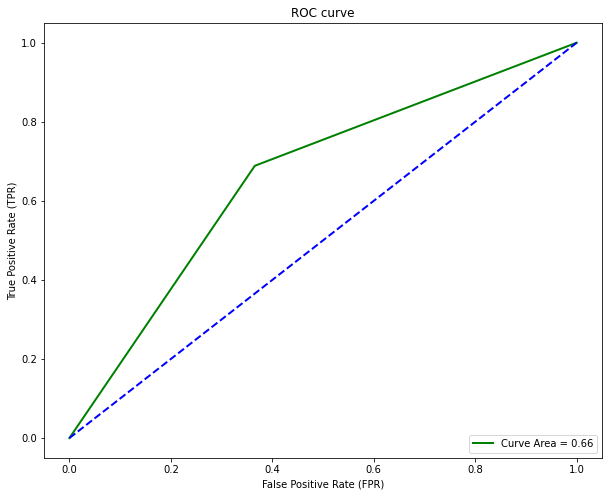

In [269]:
fpr, tpr, thr = roc_curve(y_test, svc_pred)
auc = np.round(roc_auc_score(y_test, svc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [270]:
# plot_confusion_matrix(svc_algo, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### Xg Boost

In [271]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(800, 9)

In [272]:
from xgboost import XGBClassifier

In [273]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")

In [274]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=50, ...)

#### Training Accuracy 

In [275]:
xgb_pred = xgb_model.predict(X_train)

In [276]:
accuracy = accuracy_score(y_train,xgb_pred)
print(accuracy)

0.996558197747184


#### Cross Validation

In [277]:
from sklearn.model_selection import cross_val_score,cross_val_predict
xgb_acc=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
xgb_proba=cross_val_predict(xgb_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [278]:
xgb_acc

array([0.6546875 , 0.64162754, 0.66823161, 0.70422535, 0.64788732])

In [279]:
xgb_acc.mean()

0.6633318661971831

#### Test Accuracy

In [280]:
xgb_pred = xgb_model.predict(X_test)

In [281]:
accuracy = accuracy_score(y_test,xgb_pred)
print(accuracy)

0.6925


#### Confusion Matrix

In [282]:
confusion_matrix_ = confusion_matrix(y_test, xgb_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, xgb_pred))

confusion_matrix: 
 [[268 137]
 [109 286]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       405
           1       0.68      0.72      0.70       395

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [283]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  268
False Negatives =  109
False Positives =  137
True Positives =  286


In [284]:
# plot_confusion_matrix(xgb_model, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

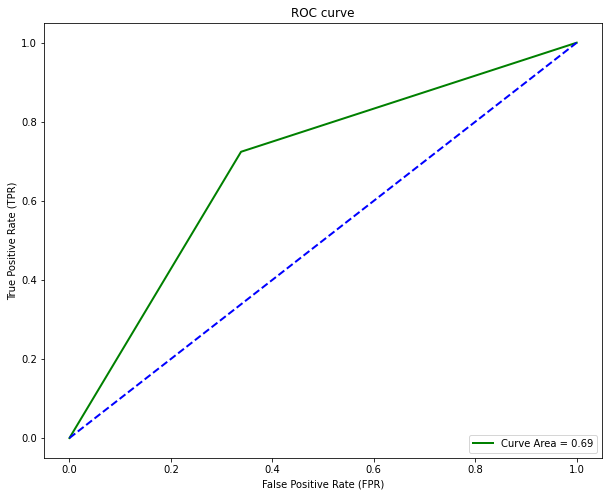

In [285]:
fpr, tpr, thr = roc_curve(y_test, xgb_pred)
auc = np.round(roc_auc_score(y_test, xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [287]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

seed = 50

# XGBClassifier parameters for the grid search
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(1, 20, 2),
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBClassifier
xgb = XGBClassifier(random_state=seed)

# Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)

# Grid search using GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_params, n_jobs=1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Get the best XGBClassifier model with optimal hyperparameters
best_xgb_model = xgb.set_params(**grid_result.best_params_)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = best_xgb_model.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

# Display the best hyperparameters
print(grid_result.best_params_)


              precision    recall  f1-score   support

           0       0.75      0.69      0.72       405
           1       0.71      0.76      0.73       395

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.72       800
weighted avg       0.73      0.72      0.72       800

[[281 124]
 [ 96 299]]
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}


In [288]:
predh = best_xgb_model.predict(X_test)

In [289]:
accuracy = accuracy_score(y_test,predh)
print(accuracy)

0.725


In [293]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
models.append(('KNN', KNeighborsClassifier(leaf_size = 1, metric ='euclidean', n_neighbors = 1, weights = 'uniform')))
models.append(('DTC', DecisionTreeClassifier(criterion = 'gini', max_depth = 17, max_features = 'auto', random_state=50)))
models.append(('RFC', RandomForestClassifier(criterion = 'gini', max_depth = 19, max_features = 'auto', n_estimators = 300, random_state=50)))
models.append(('SVC', SVC(random_state=50,probability=True)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", learning_rate = 0.1, max_depth = 15, n_estimators = 200, random_state=50, eval_metric="auc")))

names = []
scores = []
rec = []
pre = []
f = []
roc = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round((accuracy_score(y_test, y_pred)*100), 2))
    pre.append(round((precision_score(y_test,y_pred)*100), 2))
    rec.append(round((recall_score(y_test,y_pred)*100), 2))           
    f.append(round((f1_score(y_test,y_pred)*100), 2))          
    roc.append(round((roc_auc_score(y_test,y_pred)*100), 2))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': pre, 'Recall': rec, "F1-Score": f, "ROC Score": roc})
tr_split


,Name,Accuracy,Precision,Recall,F1-Score,ROC Score
0,KNN,74.38,70.47,82.78,76.14,74.48
1,DTC,62.62,61.76,63.80,62.76,62.64
2,RFC,74.38,73.51,75.19,74.34,74.39
3,SVC,66.12,64.76,68.86,66.75,66.16
4,XG Boost,72.50,70.69,75.70,73.11,72.54


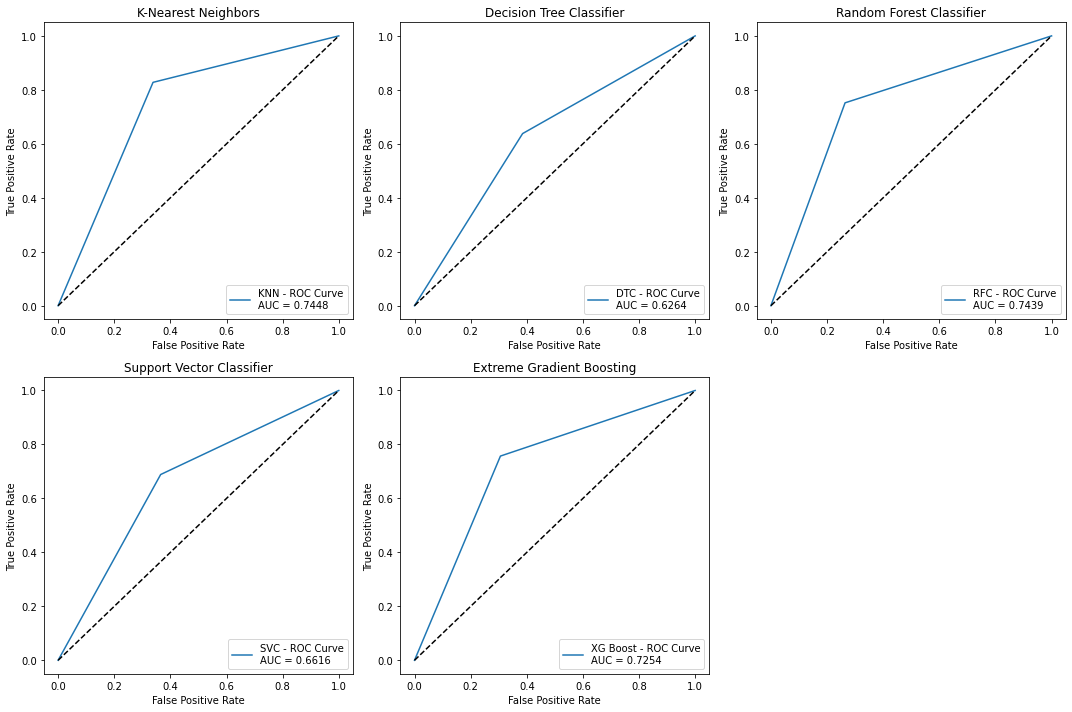

In [291]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, metric ='euclidean', n_neighbors = 1, weights = 'uniform')))
models.append(('DTC', DecisionTreeClassifier(criterion = 'gini', max_depth = 17, max_features = 'auto', random_state=50)))
models.append(('RFC', RandomForestClassifier(criterion = 'gini', max_depth = 19, max_features = 'auto', n_estimators = 300, random_state=50)))
models.append(('SVC', SVC(random_state=50,probability=True)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", learning_rate = 0.1, max_depth = 15, n_estimators = 200, random_state=50, eval_metric="auc")))

model_names = ['K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Classifier', 'Extreme Gradient Boosting']

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.subplot(2, 3, i+1)
    plt.plot(fpr, tpr, label='{} - ROC Curve\nAUC = {:.4f}'.format(name, auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_names[i])
    plt.legend(loc='lower right')
   

plt.tight_layout()
plt.show()

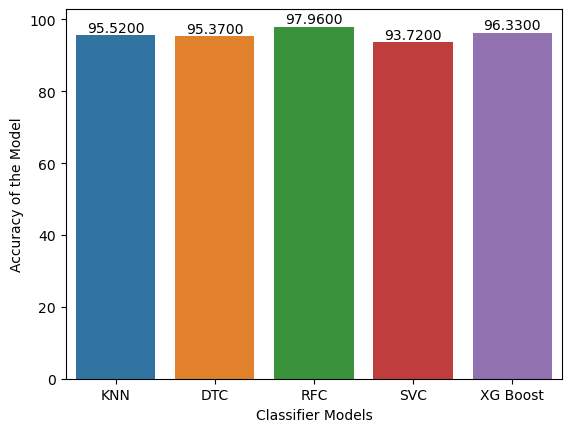

In [119]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Accuracy', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

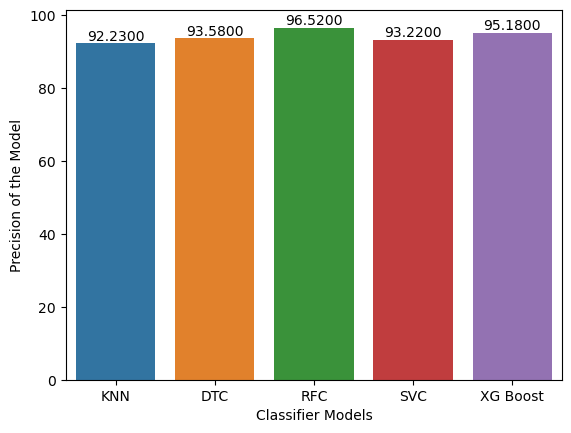

In [120]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Precision', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Precision of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

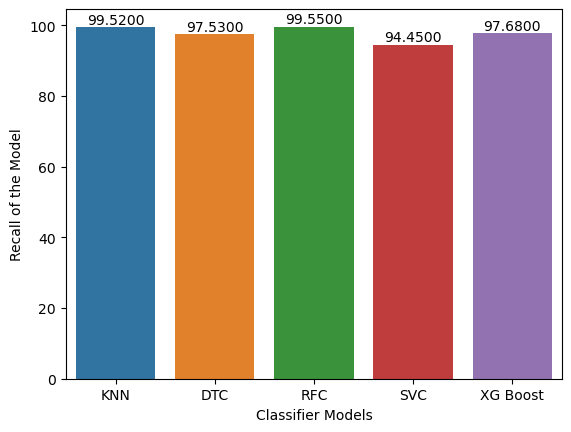

In [121]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Recall', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Recall of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

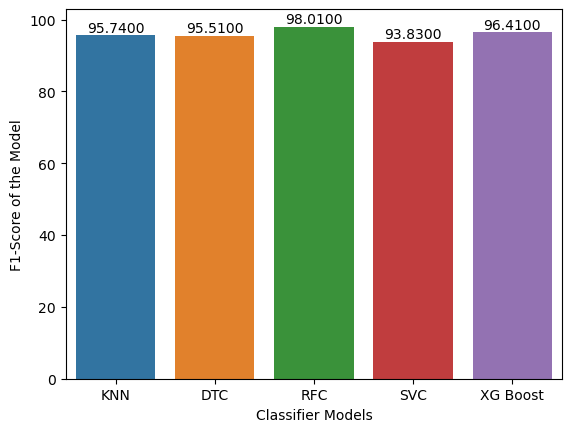

In [122]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'F1-Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='F1-Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

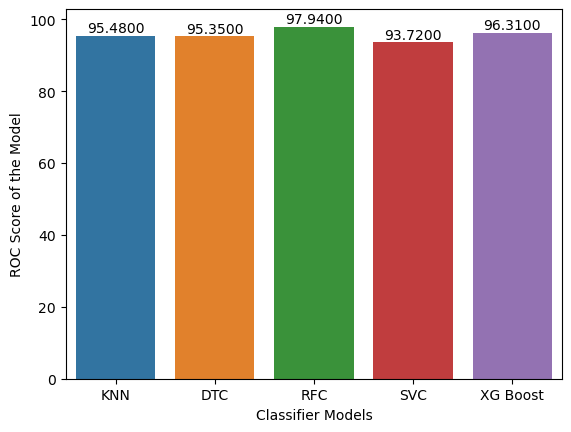

In [123]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'ROC Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='ROC Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
